## Esercizio 0
Sia $X$ una variabile casuale continua. Indichiamo con $q_1, q_2$ ed $q_3$ rispettivamente il primo, il secondo e il terzo quartile di $X$.
- 0.1. Quanto vale la probabilità che $X$ assuma valori $\leq q_2$?
  - $50\%$
- 0.2. Quanto vale la probabilità che $X$ assuma valori compresi tra $q_1$ e $q_3$?
  - $50\%$ 
- 0.3. Facciamo l’ulteriore ipotesi che $X$ sia una variabile normale di parametri $\mu$ e $\sigma^2$.
  - 0.3.1. Si determini un valore reale positivo $\alpha$ tale che sia uguale a $0.5$ la probabilità $\mathbb{P}(\mu-\alpha\sigma \leq X \leq \mu + \alpha\sigma)$.
    - $\mathbb{P}(\mu-\alpha\sigma \leq X \leq \mu + \alpha\sigma) = 0.5 $  
    $1-(\mathbb{P}(X \geq \mu+\alpha\sigma)+\mathbb{P}(\mu-*\alpha\sigma\geq X)) = 0.5$   
    $1-(2\mathbb{P}(X \leq \mu -\alpha\sigma))=0.5$    
    $1-(2\Phi(\frac{\mu -\alpha\sigma -\mu}{\sigma}))=0.5$  
    $1-(2\Phi(\alpha)) = 0.5$  
    $2\Phi(\alpha)-1 = 0.5$  
    $\Phi(\alpha) = 0.75$  
    $\alpha = 0.674$

In [1]:
qnorm(3/4,0,1)

[1] 0.6744898

- - 0.3.2. Esprimere $q_1$ e $q_3$ in funzione di $\mu$ e $\sigma$.
    - $q_1 = \mu - \alpha\sigma$  
    $q_3 = \mu + \alpha\sigma$
  - 0.3.3. Fissati, solo in questo punto, $\mu = 1$ e $\sigma = 1$, tracciare un grafico indicativo della densità di probabilità di $X$. Su tale grafico si evidenzino $q_1$, $q_3$ e la probabilità $\mathbb{P}(q_1≤X≤q_3)$.

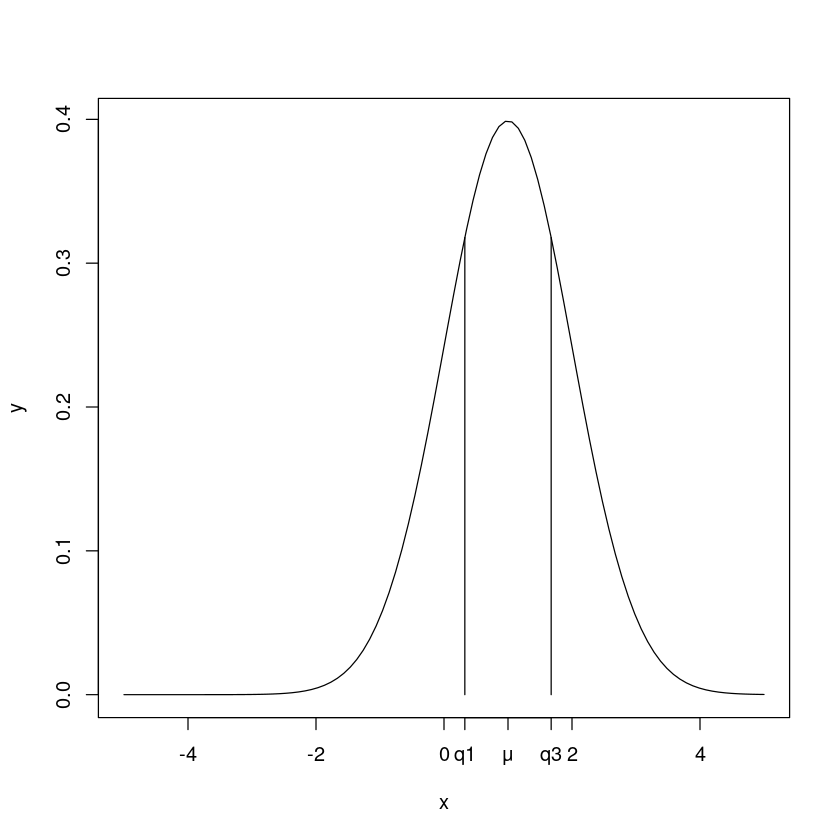

In [27]:
x = seq(from=-5,to=5,length.out=100)
y = dnorm(x,1,1)
plot(x,y,type="l")

q1 = qnorm(1/4,1,1)
q2 = qnorm(2/4,1,1)
q3 = qnorm(3/4,1,1)

lines(c(q1,q1),c(0,dnorm(q1,1,1)))
lines(c(q3,q3),c(0,dnorm(q3,1,1)))
axis(side=1,at=c(q1,q2,q3),labels=c("q1","μ","q3"))

- - 0.3.4. Controllare che la probabilità  $\mathbb{P}(\mu - 2\sigma \leq X \leq \mu + 2\sigma)$ che $X$ assuma valori in un intervallo di semi ampiezza $2\sigma$ centrato su $\mu$ è circa uguale a $0.95$.
    - $\mathbb{P}(\mu - 2\sigma \leq X \leq \mu + 2\sigma) = $  
    $1-(2\mathbb{P}(X\leq\mu-2\sigma)) = $  
    $1-(2\Phi(-2)) = $  
    $2\Phi(2)-1 \simeq 0.954$


In [28]:
2*pnorm(2,0,1)-1

[1] 0.9544997

- 0.4. Dato un campione casuale $X_1,...,X_n$ estratto da una popolazione $X$ normale di valore atteso $\mu$ e deviazione standard $\sigma$, fissati due valori $0<\delta<1$ e $\epsilon>0$, indicata con $\bar{X}$ la media campionaria $\frac{1}{n}\sum_i X_i$, e indicata con $\Phi$ la funzione di ripartizione della normale standard, si controlli che: $$\mathbb{P}(|\bar{X}-\mu|\leq\epsilon)\geq\delta \text{ è vera se } \Phi(\frac{\epsilon\sqrt{n}}{\sigma})\geq\frac{1+\delta}{2}$$
  - Sia $\frac{|\bar{X}-\mu|}{\sigma/\sqrt{n}} \approx Y \sim \mathcal{N}(0,1)$  
  $\mathbb{P}(|\bar{X}-\mu|\leq \epsilon) \geq \delta $  
  $\mathbb{P}(\frac{|\bar{X}-\mu|}{\sigma/\sqrt{n}}\leq\epsilon)\geq\delta $  
  $\mathbb{P}(|Y|\leq\frac{\epsilon\sqrt{n}}{\sigma})\geq\delta $  
  $2\Phi(\frac{\epsilon\sqrt{n}}{\sigma})-1 \geq \delta$  
  $\Phi(\frac{\epsilon\sqrt{n}}{\sigma}) \geq \frac{1+\delta}{2}$

In [5]:
data = read.csv("cani.csv", sep=";", dec=",")
data[1:5,]

,Cartella,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,S0601,NO,0,10.35,0,NA,0,2,NO,5.25,0,2.50,1.15,0.97,70,37,78.69,23.75,1.58,0.99
2,C0621,NO,0,15.21,1,1,341,3,NO,6.00,0,1.61,1.50,1.47,83,51,130.58,23.88,1.94,0.99
3,B0918,NO,0,15.77,1,1,117,3,NO,3.20,0,2.50,1.87,2.08,91,62,180.35,16.22,2.21,0.84
4,R1009,NO,0,13.54,1,1,93,4,SI,26.50,0,3.07,2.28,2.85,75,44,234.17,40.15,2.09,1.16
5,R1513,NO,0,10.72,0,NA,666,3,NO,11.00,0,2.54,0.75,0.86,69,38,139.84,43.89,1.98,1.23


In [7]:
print(nrow(data)) # 1.1
print(nrow(data[(!is.na(data$IP)) & (data$IP == "SI"),])) # 1.2 

[1] 161
[1] 58


- 1.1. Quanti sono i cani seguiti dall’ambulatorio?
  - $161$
- 1.2. Quanti cani soffrono di ipertensione?
  - $58$
- 1.3. Consideriamo ora l’età dei pazienti.
  - 1.3.1. Tracciare un istogramma dell’età dei cani con i seguenti accorgimenti:
    - fissando a un anno l’ampiezza delle classi
    - considerando gli intervalli chiusi a sinistra e aperti a destra.

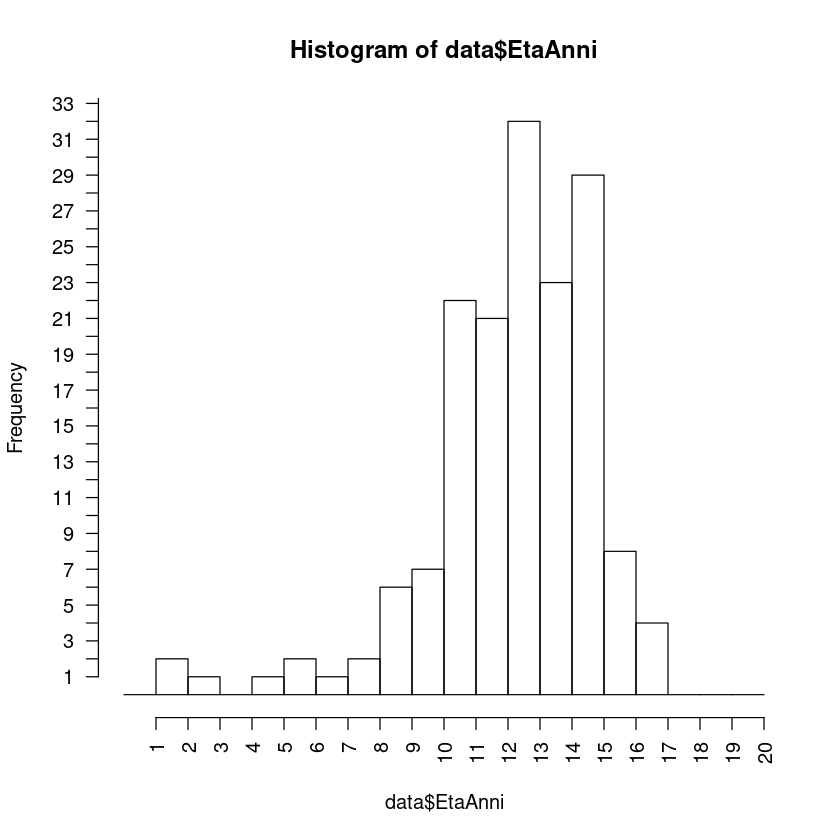

In [44]:
hist(data$EtaAnni, breaks=seq(0,20,1), right=FALSE, axes=FALSE)
axis(1, at=1:20,labels=1:20, las=2)
axis(2, at=1:40,labels=1:40, las=2)

- - 1.3.2. Descrivere l’età dei pazienti compilando la Tabella 1, in cui scegliere un opportuno indice di centralità e un opportuno indice di dispersione.

In [10]:
cat("median :", median(data$EtaAnni),end="\n")
cat("IQR    :", quantile(data$EtaAnni,0.75)-quantile(data$EtaAnni,0.25), IQR(data$EtaAnni),end="\n")

median : 12.55 
IQR    : 3.17 3.17 


- - 1.3.3. Quanti sono i pazienti di età compresa nell’intervallo tra i 12 e i 13 anni, estremo inferiore incluso ed estremo superiore escluso ?
  - 1.3.4. Quanti anni ha il cane più anziano?
  - 1.3.5. Qual è la fascia di età maggiormente rappresentata?

In [43]:
cat("1.3.3:",nrow(data[(data$EtaAnni >= 12) & (data$EtaAnni < 13),]),end="\n")
cat("1.3.4:",max(data$EtaAnni),end="\n")
cat("1.3.5:","[12,13)",end="\n")

1.3.3: 32 
1.3.4: 16.84 
1.3.5: [12,13) 


- 4. Consideriamo le variabili MORTE e MC.
  - 4.1. Quanti cani sono deceduti?

In [44]:
print(nrow(data[data$MORTE == 1,]))

[1] 118


- - 4.2. Nell’inserire le informazioni riguardo a un cane deceduto, l’operatore ha sempre specificato se la morte è avvenuta per cause cardiache o per altre cause?  Se la risposta è "no", in quanti casi (sempre relativamente ai cani deceduti) l’operatore ha omesso tale informazione?

In [45]:
nrow(data[is.na(data$MC), ])

[1] 46

- - 1.4.3. Controllare che non ci siano nei dati incongruenze riguardo alla morte, ovvero che non ci siano casi per i quali il cane risulta vivo ma morto di morte cardiaca.

In [45]:
nrow(data[(!is.na(data$MC)) & (!is.na(data$MORTE)) & (data$MC == 1) & (data$MORTE == 0),])

[1] 0

- - 1.4.4. Quanti cani sono deceduti per cause cardiache?

In [46]:
sum(!is.na(data$MC) & data$MC ==1)

[1] 87

- - 1.4.5. Tra le morti avvenute, quale percentuale è stata per cause cardiache?

In [47]:
casi_favorevoli = nrow(data[(!is.na(data$MC))& (!is.na(data$MORTE)) & (data$MC == 1)   ,])
casi_totali     = nrow(data[(!is.na(data$MC))& (!is.na(data$MORTE)) & (data$MORTE == 1),])
casi_favorevoli*100/casi_totali

[1] 75.65217

- 1.5. La variabile Gravita IP è un indice di gravità dell’ipertensione.
  - 1.5.1. Si tratta di un carattere scalare, ordinale oppure nominale?
    - ordinale
  - 1.5.2. Quali valori può assumere?
    - $\{0,1,2,3\}$
  - 1.5.3. Produrre la tabella delle frequenze relative di Gravita IP.
  

In [49]:
relative_freq = prop.table(table(data$GravitaIP))
relative_freq


         0          1          2          3 
0.63975155 0.18012422 0.11180124 0.06832298 

- 5.4. Tracciare un grafico opportuno per descrivere la gravità dell’ipertensione.

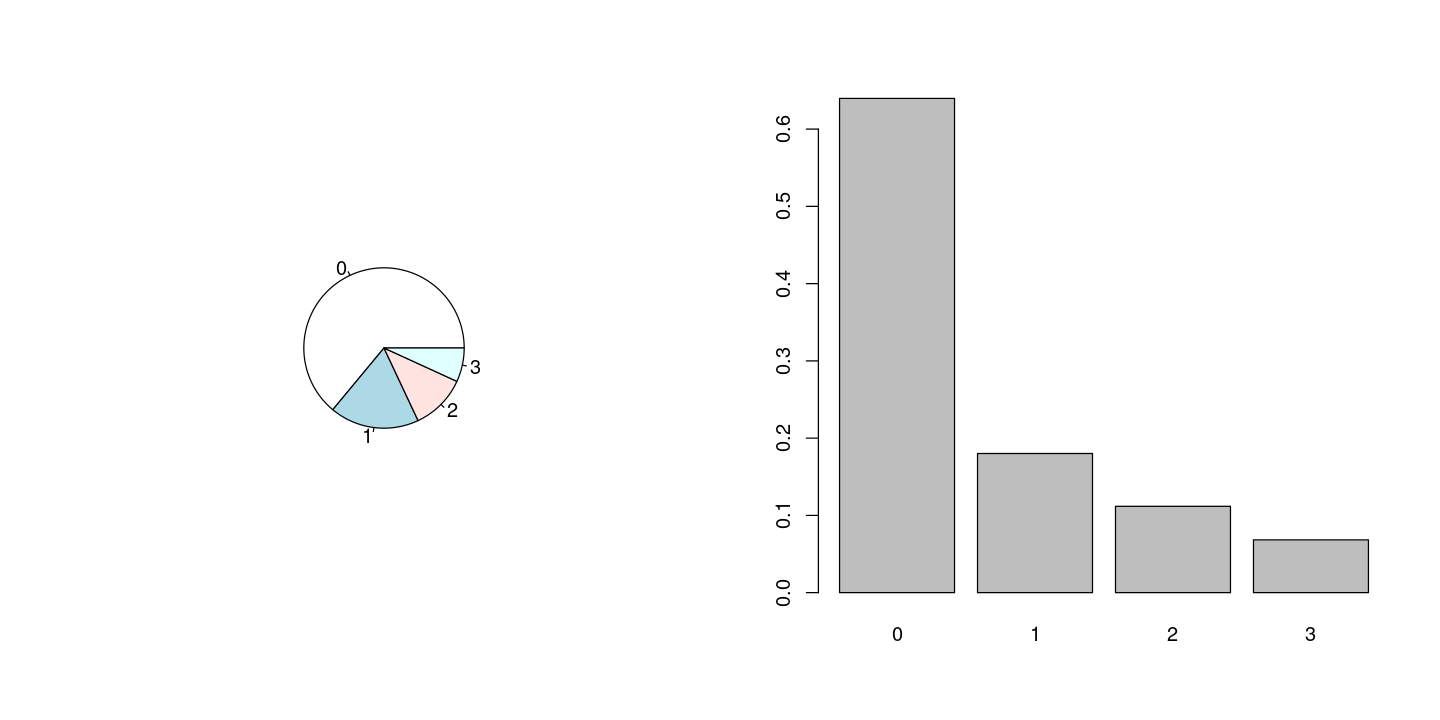

In [61]:
library(repr)
layout(matrix(1:2,1,2))
options(repr.plot.width = 12, repr.plot.height = 6)
pie(prop.table(table(data$GravitaIP)))
barplot(prop.table(table(data$GravitaIP)))

- 1.6. Consideriamo l’assunzione di farmaci antiaritmici e la morte per cause cardiache.
  - 1.6.1. Produrre la tabella delle frequenze assolute del carattere Antiaritmico.
  - 1.6.2. Quanti sono i cani che assumono un farmaco antiaritmico?
  - 1.6.3. Il carattere Antiaritmico è categorico. Volendolo convertire in un carattere numerico,con quale valore numerico mettereste in corrispondenza valore"SI"? Con quale il"NO"?
  - 1.6.4. Produrre la tabella delle frequenze assolute congiunte dei caratteri Antiaritmico e MC.
  - 1.6.5. Quale percentuale dei cani morti per cause cardiache assumeva un farmaco antiaritmico?

In [50]:
cat(rep("=",15),"1.6.1",rep("=",15),sep="","\n")
print(table(data$Antiaritmico))
cat(rep("=",15),"1.6.2",rep("=",15),sep="","\n")
print(nrow(data[data$Antiaritmico == "SI",]))
cat(rep("=",15),"1.6.3",rep("=",15),sep="","\n")
print("1 e 0 sembrano una buona soluzione")
cat(rep("=",15),"1.6.4",rep("=",15),sep="","\n")
frequenze_congiunte = table(data$Antiaritmico,data$MC) 
print(frequenze_congiunte)
cat(rep("=",15),"1.6.5",rep("=",15),sep="","\n")
casi_totali     = sum(frequenze_congiunte[,"1"])
casi_favorevoli = frequenze_congiunte["SI","1"]
cat(casi_favorevoli*100/casi_totali,"%")

===============1.6.1===============

 NO  SI 
150  11 
===============1.6.2===============
[1] 11
===============1.6.3===============
[1] "1 e 0 sembrano una buona soluzione"
===============1.6.4===============
    
      0  1
  NO 28 78
  SI  0  9
===============1.6.5===============
10.34483 %

- 1.7. Il carattere SURVIVALTIME (tempo di sopravvivenza) ci dice per quanti giorni il paziente è rimasto in vita a partire dalla prima visita presso l’ambulatorio. Come mostrato nei grafici di Figura 1, la distribuzione delle frequenze del tempo di sopravvivenza haun aspetto molto diverso se si considera rispetto ai cani ancora in vita oppure a quelli morti. Potete rispondere alle seguenti due domande semplicemente ispezionando i grafici di Figura 1, considerando un anno costituito da 365 giorni.
  - 1.7.1. Quale percentuale di cani tuttora vivi è in cura presso l’ambulatorio da menodi un anno?

In [73]:
ecdf(data[data$MORTE==0,]$SURVIVALTIME)(365)*100

[1] 65.11628

- - 1.7.2. Quale percentuale di cani deceduti è sopravvissuta più di 3 anni?

In [75]:
morti <- data[data$MORTE==1,]
s <- ecdf(morti$SURVIVALTIME)(365*3) # cani morti sopravvissuti meno di 3 anni
1-s # cani morti sopravvissuti più di 3 anni

[1] 0.1016949

## Esercizio 2
- 2.1. Tracciare un grafico opportuno per descrivere il tempo di sopravvivenza.

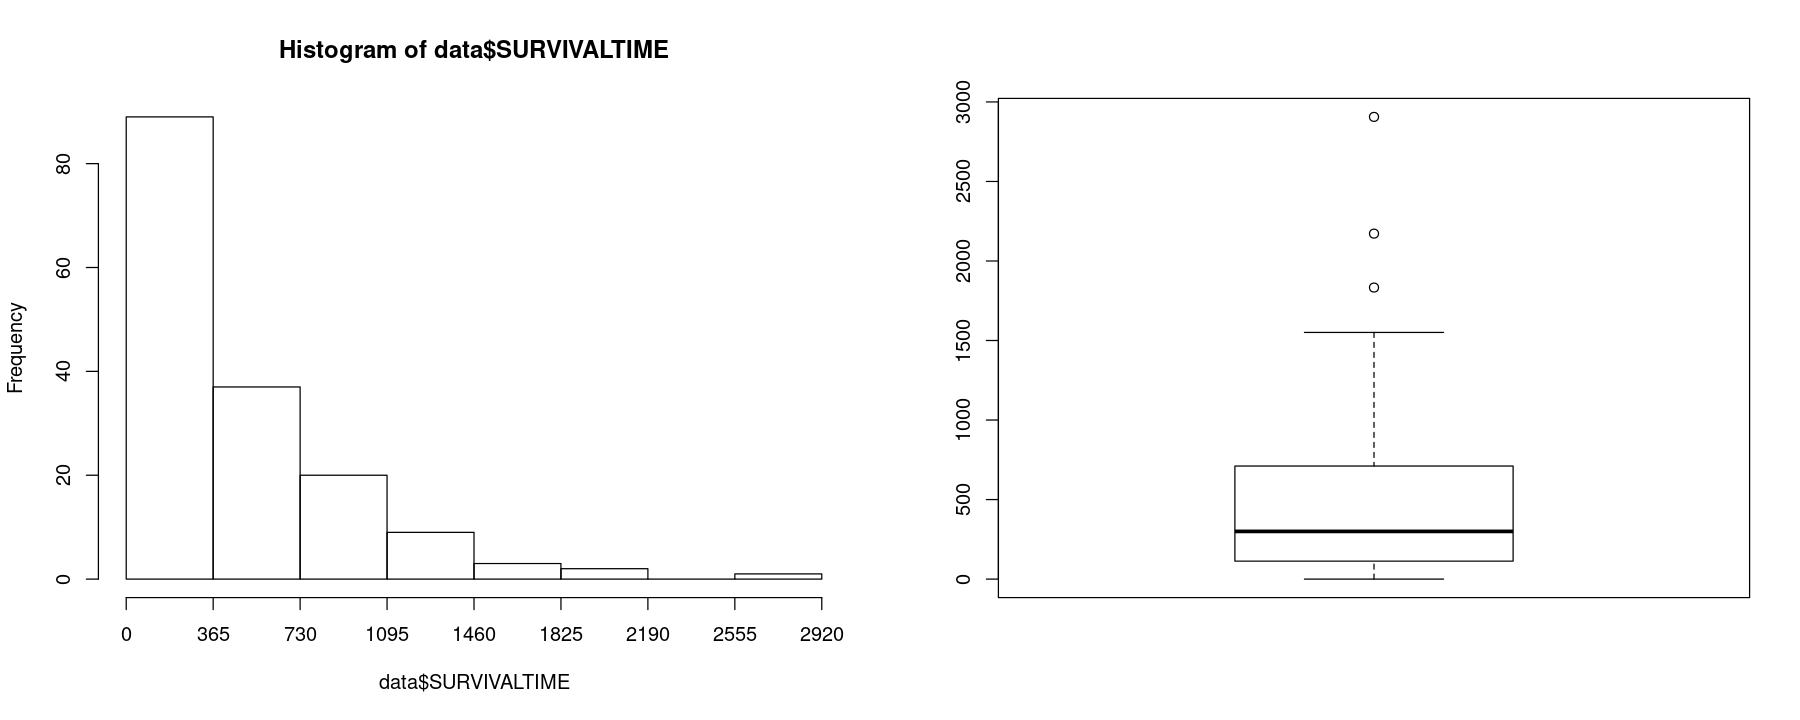

In [76]:
layout(matrix(1:2,1,2))
options(repr.plot.width = 15, repr.plot.height = 6)
hist(data$SURVIVALTIME,breaks=seq(0,3000,by=365),xaxt="n")
axis(side=1, at=seq(0,3000, 365))
boxplot(data$SURVIVALTIME)


- 2.2. Calcolare una stima del tempo di sopravvivenza atteso
  - la distribuzione sembra essere esponenziale quindi usiamo, come al solito, la media campionaria

In [78]:
mean(data$SURVIVALTIME)

[1] 459.8882

- 2.3. Esprimere, in funzione di $X_1,...,X_n$, lo stimatore $T_n$ utilizzato per eseguire la stima del punto precedente. 
  - $T_n = \frac{1}{n}\sum_{i=1}^n X_i$
- 2.4. Tale stimatore è non distorto? Si giustifichi la risposta.
  - $\mu_{T_n} = \mathbb{E}[T_n] = \mathbb{E}[\frac{1}{n}\sum_{i=1}^{n} X_i] = \frac{1}{n}\sum_{i=1}^{n}\mathbb{E}[X_i] = \frac{1}{n}n\mathbb{E}[X] = \mathbb{E}[X] = \mu_X$
- 2.5. Esprimere, in funzione di $n$ e della deviazione standard $\sigma$ della relativa popolazione, la deviazione standard di $T_n$.
  - $\sigma_{T_n}^2 = \mathbb{V}[T_n] = \mathbb{V}[\frac{1}{n}\sum_{i=1}^{n} X_i] = \frac{1}{n^2}n\mathbb{V}[X] = \frac{1}{n}\sigma_X^2$
    $\sigma_{T_n} = \frac{1}{\sqrt{n}}\sigma_X$
- 2.6. Calcolare una stima della deviazione standard del tempo di sopravvivenza.
  - usiamo lo stimatore non distorto della deviazione std. $\sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}}$ dove $\bar{x}$ è la media campionaria.

- 2.7. Determinare un numero di osservazioni sufficiente affinché, nella stima del tempo di sopravvivenza atteso, si compia un errore al più di due mesi (60 giorni) con probabilità almeno uguale a 0.9.
  - $\mathbb{P}(|T_n - \mu_{X}|\leq 60)\geq 0.9$  
  $\mathbb{P}(|\frac{T_n - \mu_{X}}{\sigma_X/\sqrt{n}}|\leq \frac{60\sqrt{n}}{\sigma_x})\geq 0.9$  
  Sappiamo che $\frac{T_n - \mu_{X}}{\sigma_X/\sqrt{n}} \approx Y \sim \mathcal{N}(0,1)$  
  $\mathbb{P}(|Y|\leq \frac{60\sqrt{n}}{\sigma_x})\geq 0.9$  
  $1-(2\Phi(\frac{-60\sqrt{n}}{\sigma_X}))\geq 0.9$  
  $\Phi(\frac{60\sqrt{n}}{\sigma_X})\geq 19/20$  
  $\Phi^{-1}(\frac{19}{20})\leq \frac{60\sqrt{n}}{\sigma_X}$  
  $\frac{\sigma_X\Phi^{-1}(\frac{19}{20})}{60} \leq \sqrt{n}$  
  $n \geq (\frac{\sigma_X\Phi^{-1}(\frac{19}{20})}{60})^2$

In [51]:
q = qnorm(19/20,0,1)
print(q)
((sd(data$SURVIVALTIME[!is.na(data$SURVIVALTIME)])*q)/60)**2

[1] 1.644854


[1] 164.0407

In [54]:
length(data$SURVIVALTIME[!is.na(data$SURVIVALTIME)])

[1] 161

- 2.8. Qual è la taglia $n$ del nostro campione? Tale valore è sufficiente a garantire le condizioni richieste al punto precedente? Si giustifichi la risposta.
  - $n = 161$, $n$ è di poco insufficiente a garantire le condizione richieste.
- 2.9. Proporre uno stimatore del tempo di sopravvivenza atteso, espresso in anni.
  - $\hat{T_n} = T_n/365$
- 2.10 Lo stimatore proposto al punto precedente è non distorto? Si giustifichi la risposta.
  - $\mathbb{E}[\hat{T}_n] = \mathbb{E}[\frac{1}{365n}\sum_{i=1}^{n} X_i] = \mathbb{E}[X/365]= \mathbb{E}[X]/365$
  che è non distorto rispetto alla v.a. $\mathbb{E}[X]/365$
- 2.11. Calcolare una stima del tempo di sopravvivenza atteso, espresso in anni.

In [84]:
mean(data$SURVIVALTIME[!is.na(data$SURVIVALTIME)])/365

[1] 1.259968

## Esercizio 3
- 3.1. I caratteri EDVI e Allodiast sono indipendenti? Motivare la risposta, anche con l’ausilio di un grafico.

[1] 0.907304

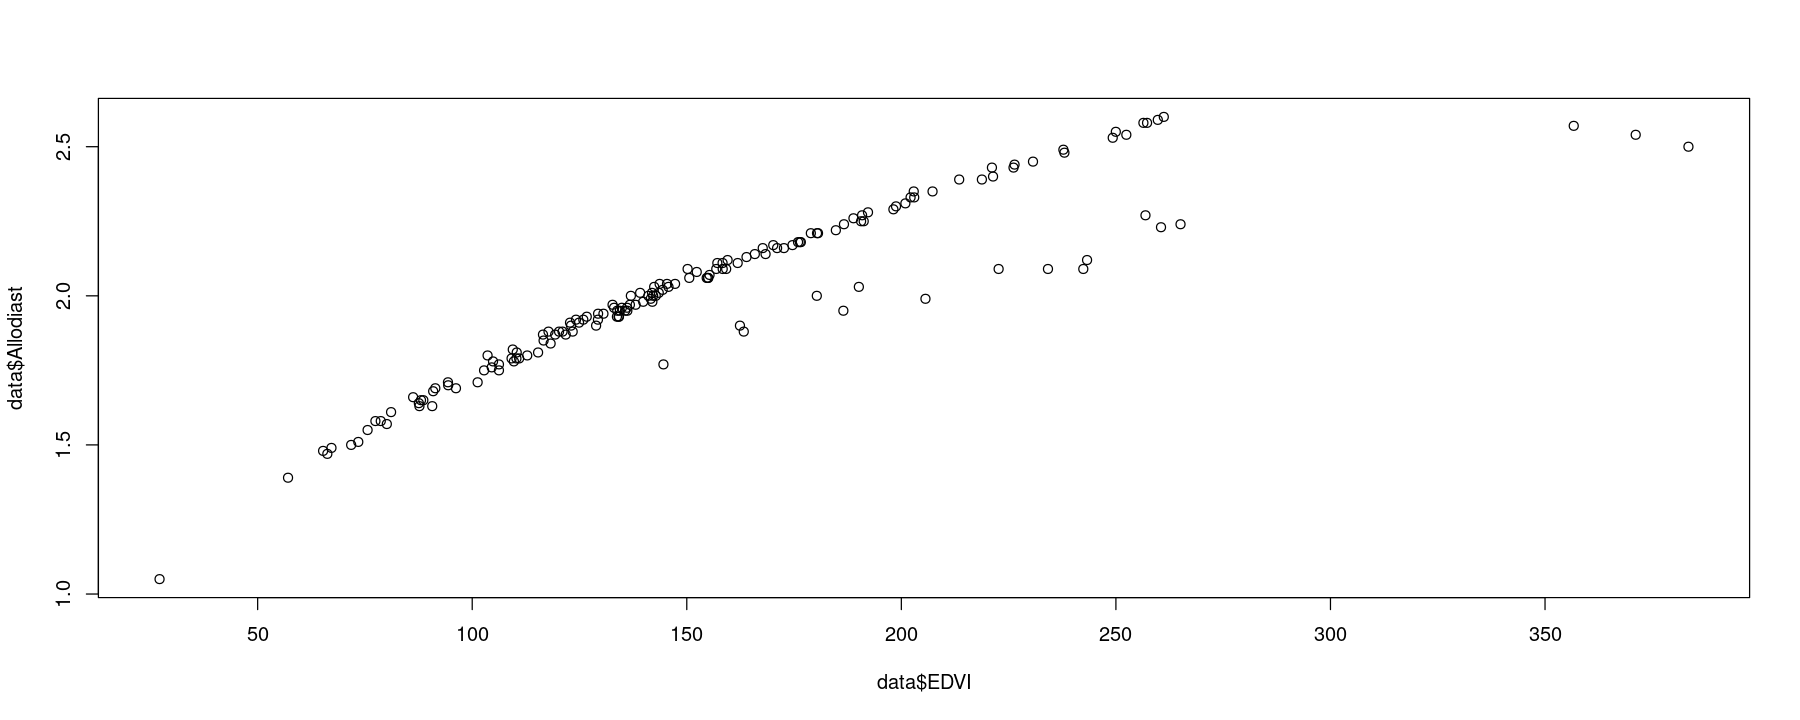

In [85]:
plot(data$EDVI, data$Allodiast)
cor(data$EDVI, data$Allodiast)

- - non si direbbero indipendenti, all'aumentare di uno aumenta anche l'altro.
- 3.2. Con l’ausilio di uno o più grafici e del valore degli indici descrittivi che conoscete, commentate l’affermazione: "La variabile Allodiast segue una legge normale".

[1] 2.013354

[1] 2

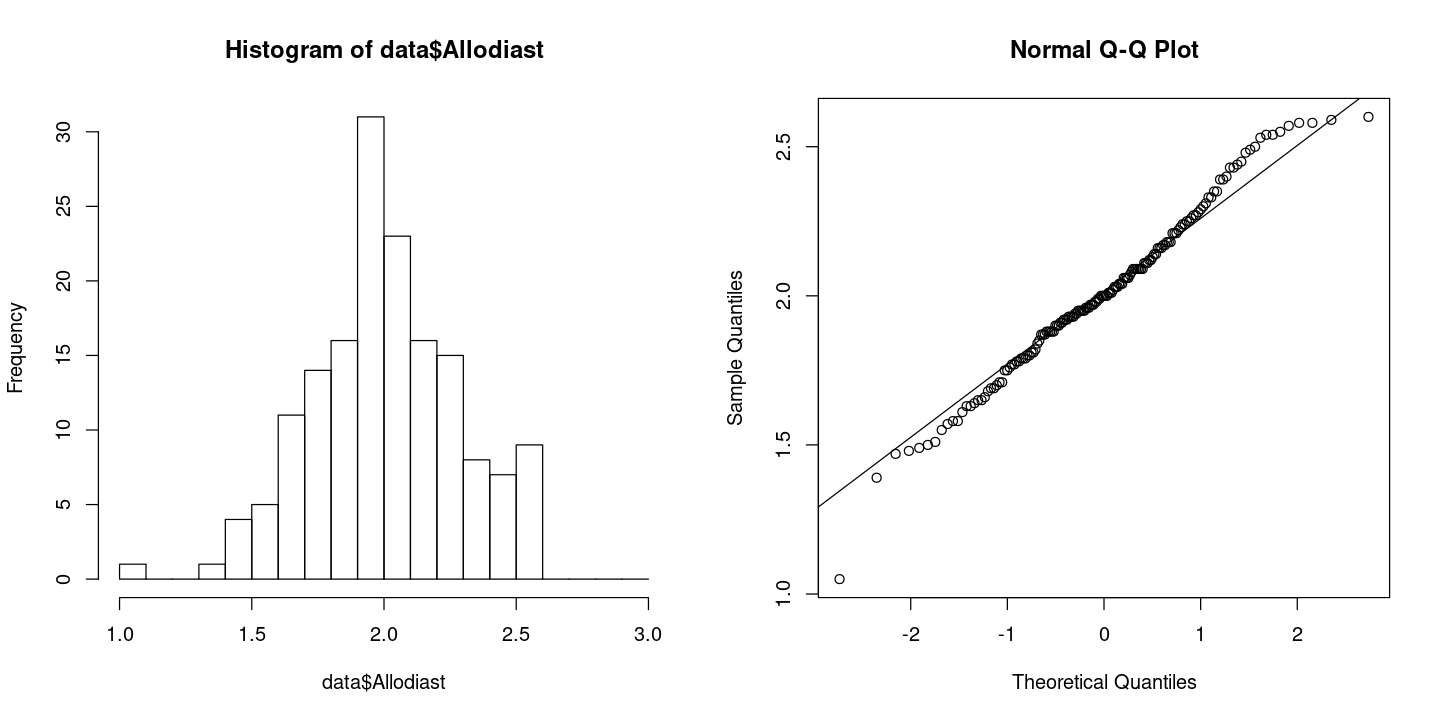

In [86]:
layout(matrix(1:2,1,2))
options(repr.plot.width = 12, repr.plot.height = 6)

hist(data$Allodiast,breaks=seq(1,3,0.1)) 

mean(data$Allodiast)
median(data$Allodiast)

qqnorm(data$Allodiast)
qqline(data$Allodiast)

- - A giudicare dall'istogramma si direbbe abbastanza simile ad una campana simmetrica con una leggera divergenza nelle code.  
  - media e mediana sono praticamente uguali (il che è vero per v.a. normali)
  - il qqplot mosta che la nostra distribuzione si adagia molto bene ad una normale.
- 3.4. Verificare se le osservazioni di Allodiast sono coerenti con la proprietà al punto 3.4. dell’esercizio 0.

In [91]:
mu = mean(data$Allodiast[!is.na(data$Allodiast)])
sigma = sd(data$Allodiast[!is.na(data$Allodiast)])
cdf = ecdf(data$Allodiast[!is.na(data$Allodiast)])
cdf(mu+2*sigma)-cdf(mu-2*sigma)

[1] 0.9627329

il che è molto vicino a $0.95$